Standardizing your data before starting in on machine learning routines is paramount. Not only does it allow your algorithms to converge faster (by delta'ing over a much narrower scope of data), but it also prevents any features scaled arbitrarily larger from having an inflated weight on whatever your model winds up learning.

E.g. a "0, 1, 2 car garage" probably has more predictive power on a home value than "0-10,000" jelly beans could fit in the master bathtub. Probably.

## Getting the Data

Loading one of the gimmie datasets from `scikitlearn`

In [1]:
from sklearn.datasets import load_boston

data = load_boston()
X = data['data']

Stuffing into a `pandas DataFrame` for easier inspection

In [2]:
import pandas as pd

df = pd.DataFrame(X, columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


And if you look at each attribute, there's a huge spread of:

* Relative difference between max and min
* Numeric scale of the attribute

In [3]:
df.describe().T[['max', 'min']]

,max,min
CRIM,88.9762,0.00632
ZN,100.0000,0.00000
INDUS,27.7400,0.46000
CHAS,1.0000,0.00000
NOX,0.8710,0.38500
RM,8.7800,3.56100
AGE,100.0000,2.90000
DIS,12.1265,1.12960
RAD,24.0000,1.00000
TAX,711.0000,187.00000


## Approaches

And so we have two ways of resolving this data imbalance.

### Normalization

This is essentially ensuring that each column will have values between `0` and `1`.

We achieve this by finding out the range of values for each column

In [4]:
spread = df.max() - df.min()
spread

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
dtype: float64

And then, per row, subtracting the minimum value and then dividing by that spread.

In [5]:
normed_df = (df - df.min()) / spread
normed_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [6]:
normed_df.describe().T[['min', 'max']]

,min,max
CRIM,0.0,1.0
ZN,0.0,1.0
INDUS,0.0,1.0
CHAS,0.0,1.0
NOX,0.0,1.0
RM,0.0,1.0
AGE,0.0,1.0
DIS,0.0,1.0
RAD,0.0,1.0
TAX,0.0,1.0


However, this handles outlier data... poorly

Populating the interactive namespace from numpy and matplotlib


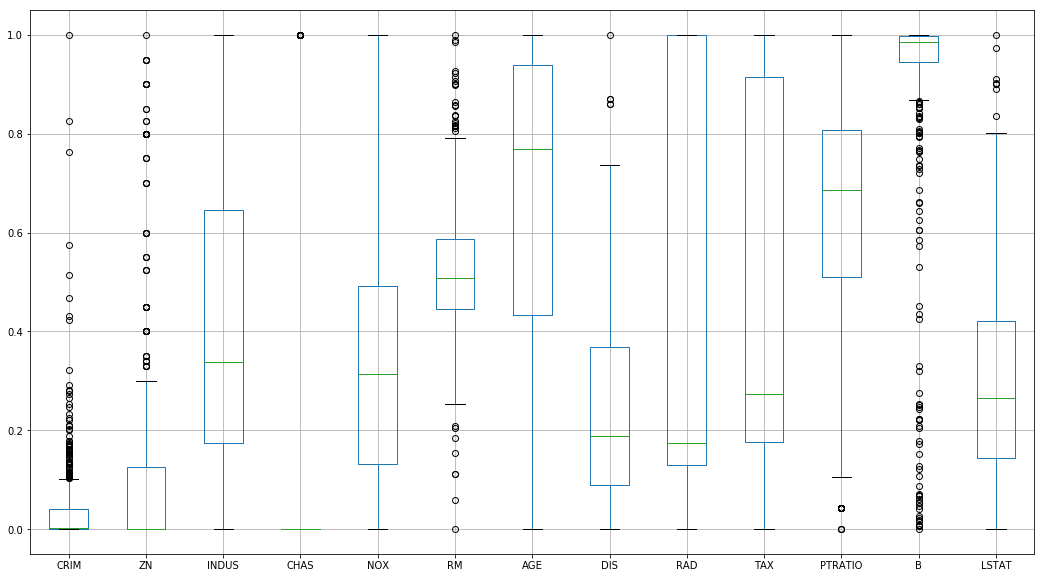

In [7]:
%pylab inline

_ = normed_df.boxplot(figsize=(18, 10))

### Standardization

Instead, we'll try *standardization*, which substracts the mean from each value and then divides by the standard deviation.

In [8]:
means = df.mean()
means

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [9]:
stand_df = (df - means) / df.std()
stand_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


This, of course, leads to data that falls out of our neat, [0:1] range

In [10]:
stand_df.describe().T[['min', 'max']]

,min,max
CRIM,-0.417300,9.931906
ZN,-0.487240,3.800473
INDUS,-1.556302,2.420170
CHAS,-0.272329,3.664771
NOX,-1.464433,2.729645
RM,-3.876413,3.551530
AGE,-2.333128,1.116390
DIS,-1.265817,3.956602
RAD,-0.981871,1.659603
TAX,-1.312691,1.796416


But does a... marginally better job at handling outliers

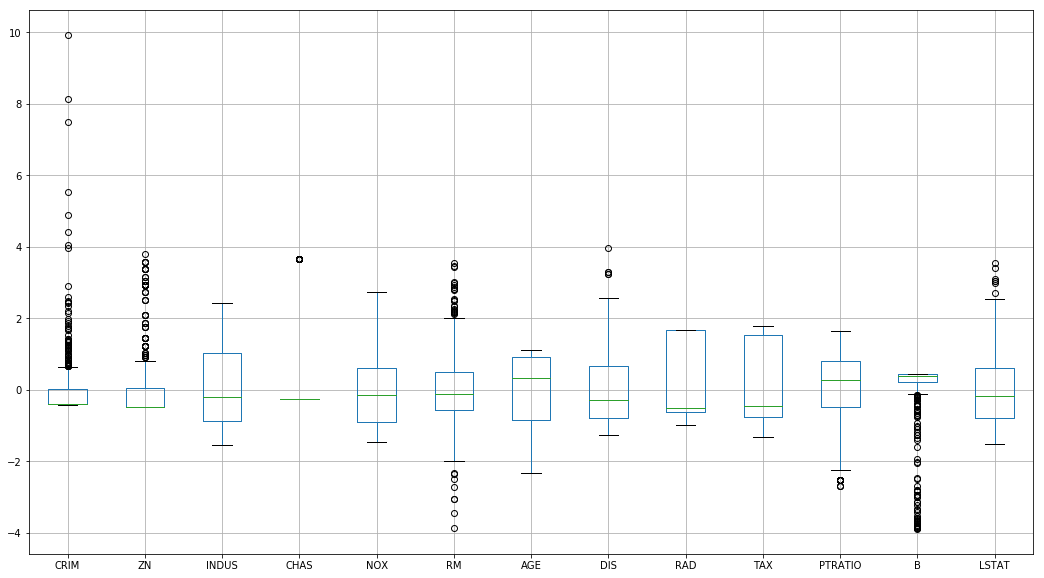

In [11]:
stand_df.boxplot(figsize=(18, 10))

And forces each variable to follow a useful unit distribution with mean 0

In [12]:
stand_df.describe().T[['mean', 'std']]

,mean,std
CRIM,1.144232e-16,1.0
ZN,3.466704e-16,1.0
INDUS,-3.016965e-15,1.0
CHAS,3.999875e-16,1.0
NOX,3.563575e-15,1.0
RM,-1.149882e-14,1.0
AGE,-1.158274e-15,1.0
DIS,7.308603e-16,1.0
RAD,-1.068535e-15,1.0
TAX,6.534079e-16,1.0


## Using Scikit-Learn

Of course, if we weren't interested in taking our `numpy` data, piping it into a `pandas.DataFrame`, doing our transformations, and then `.values`'ing our way back to `numpy`, `sklearn` provides a useful class to handle this.

In [13]:
# Again, for demonstration
df.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
CRIM,3.593761,8.596783,0.00632,88.9762
ZN,11.363636,23.322453,0.00000,100.0000
INDUS,11.136779,6.860353,0.46000,27.7400
CHAS,0.069170,0.253994,0.00000,1.0000
NOX,0.554695,0.115878,0.38500,0.8710
RM,6.284634,0.702617,3.56100,8.7800
AGE,68.574901,28.148861,2.90000,100.0000
DIS,3.795043,2.105710,1.12960,12.1265
RAD,9.549407,8.707259,1.00000,24.0000
TAX,408.237154,168.537116,187.00000,711.0000


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
pd.DataFrame(scaler.transform(X)).describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
0,6.340997e-17,1.00099,-0.417713,9.941735
1,-6.343191e-16,1.00099,-0.487722,3.804234
2,-2.682911e-15,1.00099,-1.557842,2.422565
3,4.701992e-16,1.00099,-0.272599,3.668398
4,2.490322e-15,1.00099,-1.465882,2.732346
5,-1.145230e-14,1.00099,-3.880249,3.555044
6,-1.407855e-15,1.00099,-2.335437,1.117494
7,9.210902e-16,1.00099,-1.267069,3.960518
8,5.441409e-16,1.00099,-0.982843,1.661245
9,-8.868619e-16,1.00099,-1.313990,1.798194
